# Sentiment Analysis Using NLP 📊

Welcome to the world of Natural Language Processing! In this notebook, we'll explore how to analyze sentiment from customer reviews using some powerful NLP techniques. Buckle up as we dive into some code, data, and hopefully minimal headaches along the way...

In [1]:
# Let's import all the necessary libraries to work with data, visualize it, and perform some NLP magic ✨
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# We'll use ggplot style for prettier plots 🎨
plt.style.use('ggplot')

# For Natural Language Processing (NLP) tasks, we'll need the NLTK library
import nltk

In [2]:
# Let's load in the dataset and see what we're working with 
#can be found here : 'https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews'
df = pd.read_csv('data/Reviews.csv')  # Reading the reviews data
print(df.shape)  # Check the original shape of the dataset
df = df.head(500)  # Taking a small subset of 500 reviews to keep things light
print(df.shape)  # Print the new shape of the dataset

(568454, 10)
(500, 10)


In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


**brief data visualization**

Takeing a quick peek at the distribution of review scores in our dataset. We'll use a bar plot to show how many reviews correspond to each star rating (1 to 5 stars). This gives us a nice overview of how positive (or not) people feel overall. 

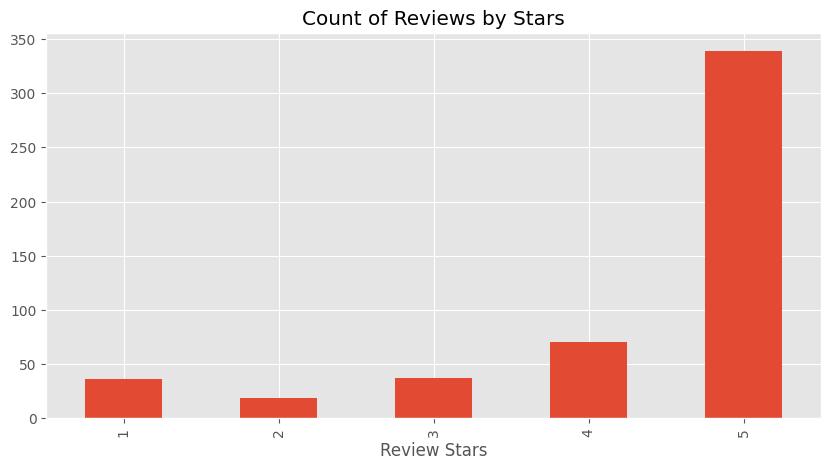

In [47]:
# Plotting the count of reviews by their star rating
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar', 
          title='Count of Reviews by Stars', 
          figsize=(10, 5))  # Making sure our plot is large and readable

ax.set_xlabel('Review Stars')  # Label the x-axis to show stars
plt.show()  

**Basic NLTK**

Now it's time to dive into some Natural Language Processing (NLP) with the Natural Language Toolkit (NLTK).

We'll take a review
* break it into tokens (words)
* tag each word with its part of speech (POS)
* then look for any named entities (like people or organizations)

In [51]:
# Let's take an example review from our dataset and see how NLTK processes it
example = df['Text'][50]  # Grab the 50th review for our example
print(example)  # Print the raw review text to see what we're working with

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [52]:
# Tokenizing the text into individual words (tokens)
tokens = nltk.word_tokenize(example)
print(tokens[:10])  # Display the first 10 tokens for a quick preview

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']


In [8]:
# Part-of-speech tagging - tagging each token with its grammatical role (noun, verb, etc.)
tagged = nltk.pos_tag(tokens)
print(tagged[:10])  # Show the first 10 tagged tokens to see how NLTK tags them

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [53]:
# Named entity recognition (NER) - identifying entities like people, places, and organizations
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()  # Pretty-print the named entities to see what NLTK finds

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


**VADER Sentiment Scoring**

In this section, we’ll utilize NLTK’s SentimentIntensityAnalyzer to assess the sentiment of our text data. This tool will help us get a clearer picture of how positive, negative, or neutral our reviews are.

The scoring uses a "bag of words" approach:

* Stop words (common words like 'the', 'is', etc.) are removed.
* Each word is assigned a score, which we then combine to calculate a total sentiment score.

In [54]:
# Importing the SentimentIntensityAnalyzer and a progress bar for our loop
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

In [56]:
# Now let's analyze our example review
print(sia.polarity_scores(example))  # Get the sentiment scores for the example review

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}


In [58]:
# Now let's analyze our example review
print(sia.polarity_scores(example))  # Get the sentiment scores for the example review

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}


In [59]:
# Run the polarity score on the entire dataset and store the results
res = {}  # Initialize a dictionary to store results
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']  # Get the review text
    myid = row['Id']  # Get the review ID
    res[myid] = sia.polarity_scores(text)  # Get the polarity scores for each review

  0%|          | 0/500 [00:00<?, ?it/s]

In [60]:
# Convert the results dictionary into a DataFrame
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})  # Reset index and rename

# Merge the sentiment scores with the original dataframe
vaders = vaders.merge(df, how='left')

# Display the first few rows of the final DataFrame
vaders.head()  

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


**Plot VADER results**
Now that we have our sentiment scores, it's time to visualize them.
In this section, we’ll create bar plots to showcase:
* the compound score for each Amazon star review
* separate plots for positive, neutral, and negative sentiment scores

Visualizing our results helps us quickly understand how the sentiment varies with different star ratings. 


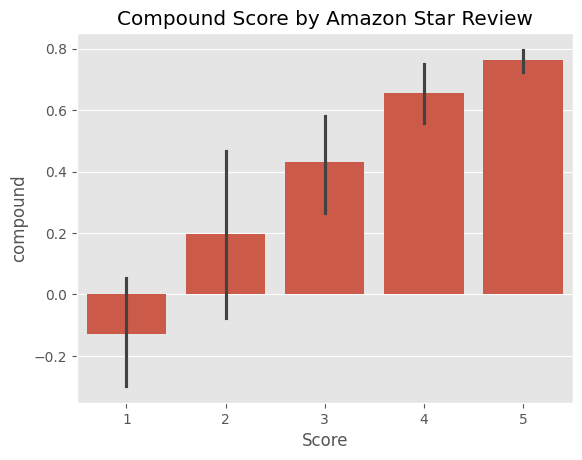

In [61]:
# Plotting the compound score by Amazon star review
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compound Score by Amazon Star Review')  # Title for the plot
plt.show()  # Display the compound score plot

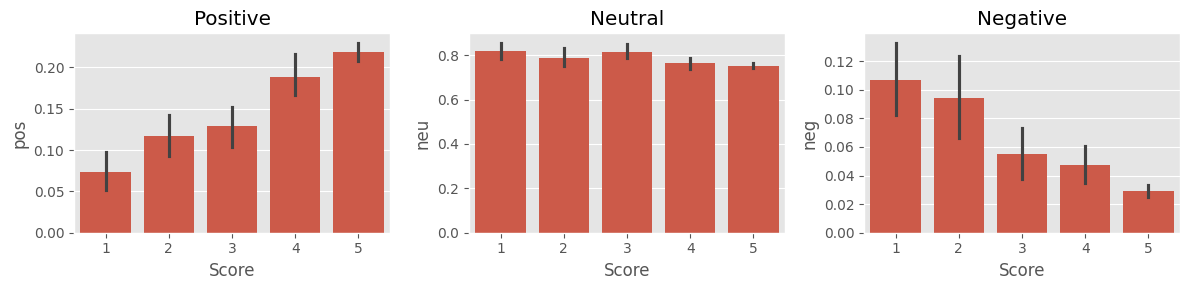

In [62]:
# Creating plots for each sentiment: Positive, Neutral, and Negative
fig, axs = plt.subplots(1, 3, figsize=(12, 3))  # Setting up subplots for our three sentiment types

# Plotting Positive sentiment scores
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
axs[0].set_title('Positive')  # Title for the positive sentiment plot

# Plotting Neutral sentiment scores
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
axs[1].set_title('Neutral')  # Title for the neutral sentiment plot

# Plotting Negative sentiment scores
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[2].set_title('Negative')  # Title for the negative sentiment plot

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Show all plots

**Roberta Pre-trained Model**

In this section, we’ll harness the power of the RoBERTa model, which has been pre-trained on a large corpus of text data.
This transformer model not only considers individual words but also captures the context related to other words in a sentence. This ability to understand context is what makes it so powerful for sentiment analysis.


In [63]:
# Importing necessary libraries for using the RoBERTa model
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [64]:
# Define the model we are going to use
MODEL = "cardiffnlp/twitter-roberta-base-sentiment-latest"

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [65]:
# VADER results on the example text
print(example)  # Display the example text for reference
print(sia.polarity_scores(example))  # Show VADER sentiment scores for comparison

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.
{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}


In [66]:
# Running the RoBERTa model for sentiment analysis
encoded_text = tokenizer(example, return_tensors='pt')  # Tokenize the example text
output = model(**encoded_text)  # Get the model output
scores = output[0][0].detach().numpy()  # Extract the scores
scores = softmax(scores)  # Apply softmax to convert scores to probabilities

# Create a dictionary to hold the RoBERTa sentiment scores
scores_dict = {
    'roberta_neg': scores[0],  # Negative score
    'roberta_neu': scores[1],  # Neutral score
    'roberta_pos': scores[2]   # Positive score
}
print(scores_dict)  # Display the scores dictionary

{'roberta_neg': 0.9535124, 'roberta_neu': 0.040926386, 'roberta_pos': 0.0055612465}


In [67]:
# Function to calculate sentiment scores using RoBERTa
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')  # Tokenize the input text
    output = model(**encoded_text)  # Get the model output
    scores = output[0][0].detach().numpy()  # Extract the scores
    scores = softmax(scores)  # Convert scores to probabilities
    scores_dict = {
        'roberta_neg': scores[0],  # Negative score
        'roberta_neu': scores[1],  # Neutral score
        'roberta_pos': scores[2]   # Positive score
    }
    return scores_dict  # Return the scores


In [68]:
# Prepare to collect results from the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']  # Get the review text
        myid = row['Id']    # Get the review ID
        # Get VADER sentiment scores
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value  # Rename VADER scores for clarity
        # Get RoBERTa sentiment scores
        roberta_result = polarity_scores_roberta(text)
        # Combine both results into one dictionary
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both  # Store the combined results
    except RuntimeError:
        print(f'Broke for id {myid}')  # Handle any errors that occur

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


In [69]:
# Create a DataFrame to store the results
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})  # Reset index and rename
results_df = results_df.merge(df, how='left')  # Merge results with the original DataFrame

**Combine and compare**
In this exciting section, we will:
* combine the sentiment scores obtained from both the VADER and RoBERTa models
* visualize how they compare against each other

By plotting these scores, we can see if the models agree on the sentiment of the reviews or if they diverge. This can provide valuable insights into the strengths and weaknesses of each approach.


In [70]:
# Check the columns in the results DataFrame to see the sentiment scores
results_df.columns  # Display the column names

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

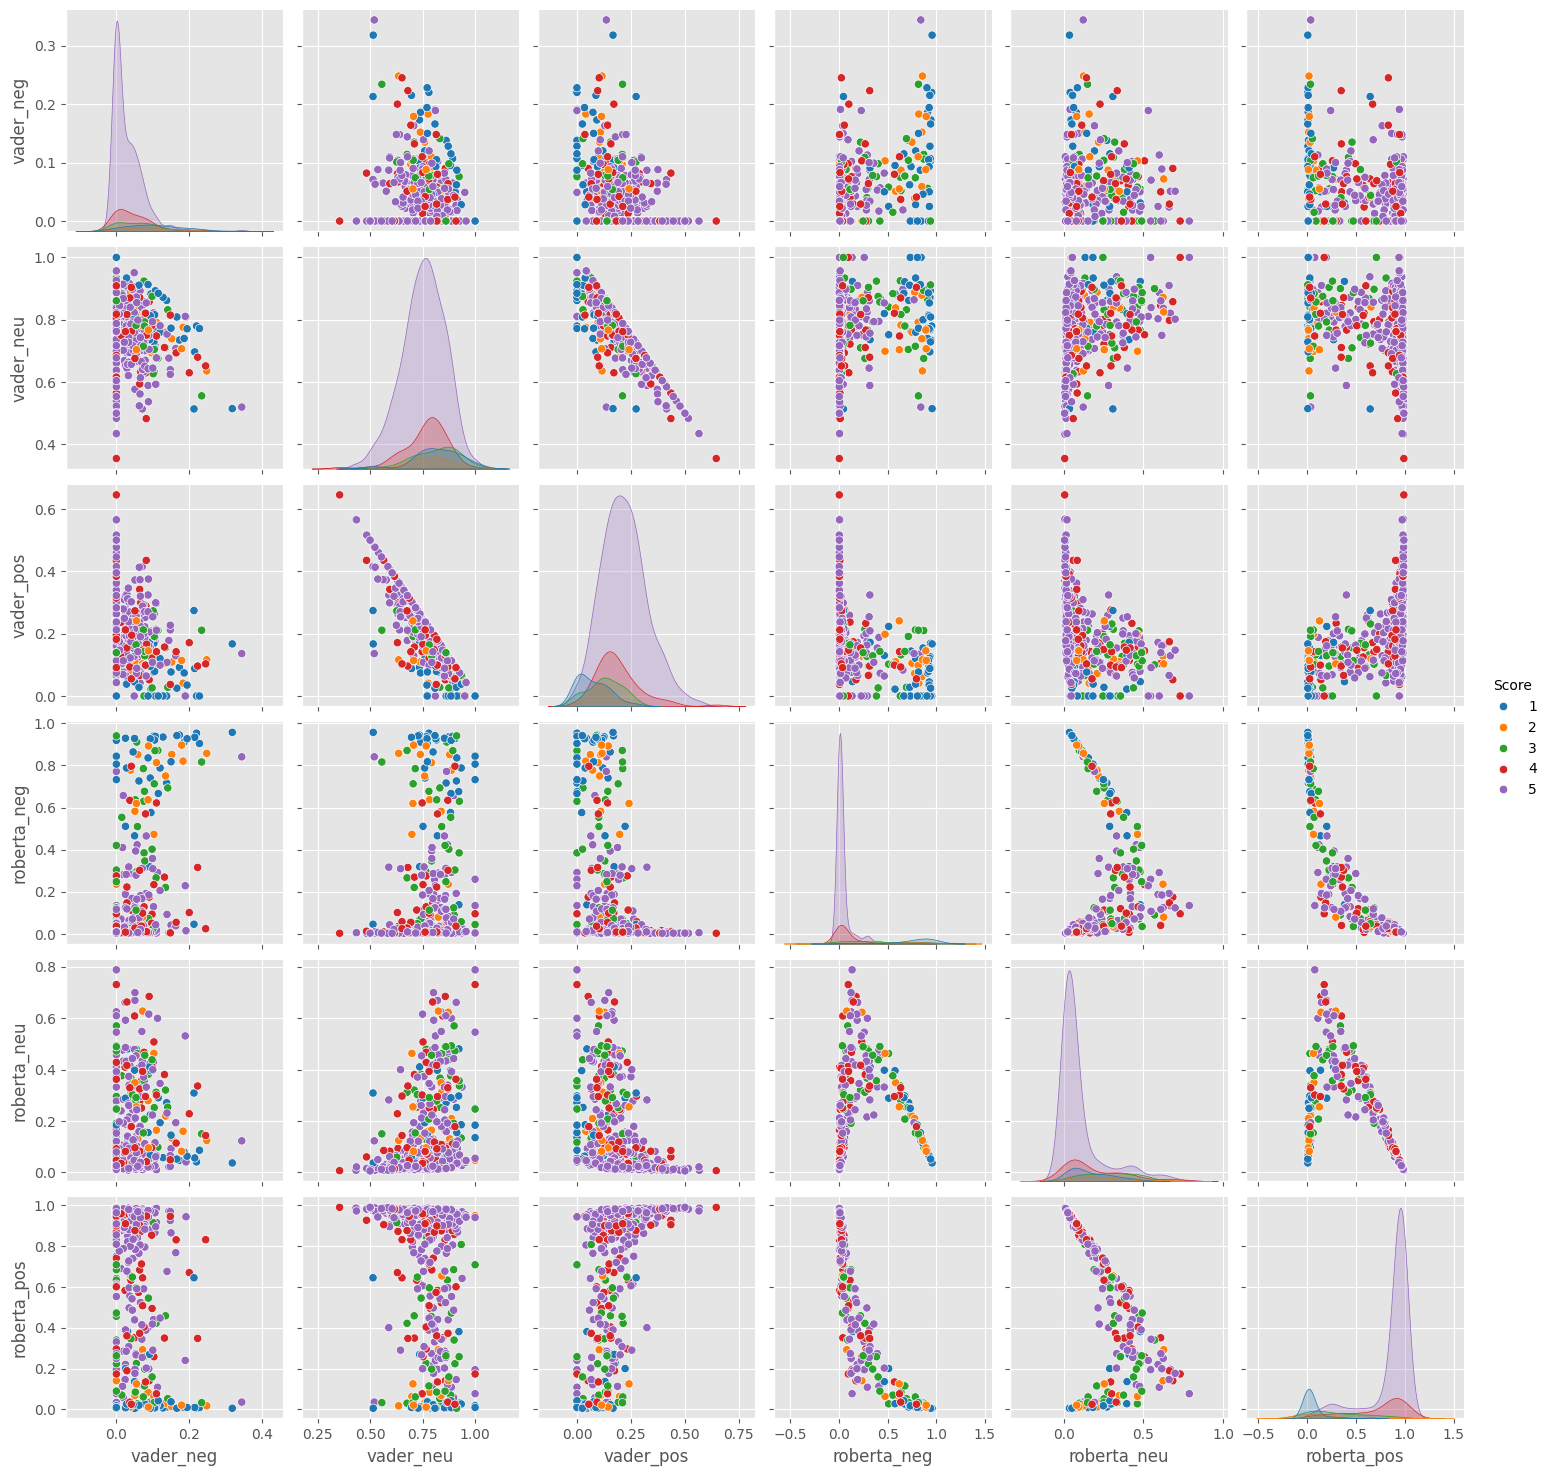

In [71]:
# Creating a pairplot to compare VADER and RoBERTa sentiment scores
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                   'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',  # Color the points based on the review score
            palette='tab10')  # Use a color palette for better visibility

plt.show()  # Display the pairplot

**Review Examples: Positive 1-Star and Negative 5-Star Reviews**

In this section, we’ll explore some intriguing examples where the model's scoring and the actual review scores differ the most. 
* we'll look at 1-Star reviews that have a surprisingly positive sentiment according to our models
* 5-Star reviews that contain negative sentiments 
This can reveal how well our models are performing and where they might be misjudging the sentiment of the text.

In [76]:
# Fetching the most positive 1-Star review according to the RoBERTa model
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [77]:
# Fetching the most positive 1-Star review according to the VADER model
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [42]:
# Fetching the most negative 5-Star review according to the RoBERTa model
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [78]:
# Fetching the most negative 5-Star review according to the VADER model
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'